# Predicting Breast Cancer Diagnosis Using Machine Learning
## Biomedical Data Science
## Capstone Project 10/20/2025
## Victoria Li

# Introduction

Breast cancer is one of the most prevalent cancers that affect women worldwide. According to the American Cancer Society, breast cancer accounts for 1 in 3 all new female cancers annually and in the U.S, there is a 1 in 8 chance a woman will develop it some time in her lifetime. Breast cancer occurs when damaging cells in breast tissue grow uncontrollably and can eventually undergo metastasis, spreading to surrounding tissues. Thus, early detection and accurate diagnosis is crucial since they significantly increase the chances of successful treatment and survival. Developing reliable models that can classify breast tumors as benign or malignant is a potential remedy.

# Background: Breast Cancer Diagnosis
Breast cancer diagnosis usually begins with imaging techniques, like a mammography, ultrasound, or MRI. If a suspicious mass is detected, a fine needle aspirate (FNA) can be performed to extract and characterize the breast tissue cells to help determine whether the tumor is cancerous or not. While experts can evaluate the tumor features, the process is time consuming. Hence, machine learning algorithms can help automate and support diagnostic decisions to improve accuracy as well as consistency of cancer diagnoses.
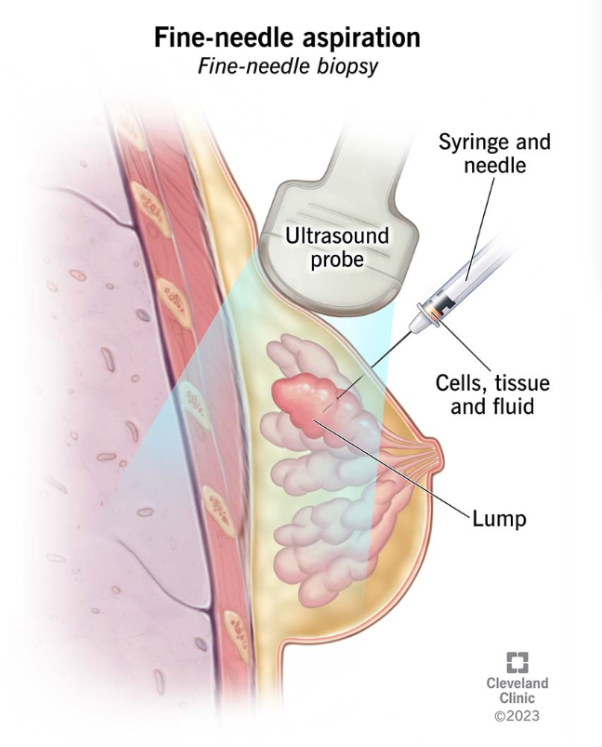

# University of California, Irvine, Breast Cancer Wisconsin (Diagnostic) Dataset
The UCI dataset is a useful benchmark for breast cancer diagnosis and was created by William H. Wolberg at the University of Wisconsin Hospitals. It contains measurements of 30 features for each tumor, such as radius, area, concavity, and texture, that were computed from images of FNA. Each of the 10 real-valued features is measured by mean value, standard error, and the mean of the three largest values (“worst”). The dataset includes a total of 569 samples, with 357 categorized as benign and 212 malignant based on expert diagnosis. The goal of this project is to use these diagnostic features to build and evaluate machine learning models that can accurately distinguish between benign and malignant tumors.

## Table 1. First Few Rows of UCI Dataset

In [10]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_curve, auc, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# setting random seed and plot style
np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# loading data from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

column_names = ['id', 'diagnosis'] + [
    f'{feature}_{stat}'
    for feature in ['radius', 'texture', 'perimeter', 'area', 'smoothness',
                    'compactness', 'concavity', 'concave_points', 'symmetry',
                    'fractal_dimension']
    for stat in ['mean', 'se', 'worst']
]

df = pd.read_csv(url, names=column_names)

# displaying the UCI data
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (569, 32)

First few rows:


,id,diagnosis,radius_mean,radius_se,radius_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,...,concavity_worst,concave_points_mean,concave_points_se,concave_points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Data Analysis
As shown in Figure 1, the dataset shows an imbalance of benign and malignant cases, which reflects realistic clinical distributions. Furthermore, there are strong positive correlations between the features radius, perimeter, and area as well as between compactness, concavity, and concave points, which is illustrated in Figure 2. The distribution plot in Figure 3 and box plot in Figure 4 indicate that the “worst” measurements, especially radius, perimeter, and area, show the strongest distinction between benign vs malignant cases.

## Figure 1. Distribution of Breast Cancer Diagnoses from UCI Dataset
## Figure 2. Correlation Heatmap of the 10 Mean Features
## Figure 3. Distribution of Key Features by Diagnosis (Benign vs Malignant)
## Figure 4. Box Plots of Selected Features by Diagnosis (Benign vs Malignant)

Dataset Information:
Number of samples: 569
Number of features: 30

Missing values: 0

Diagnosis Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Percentage Benign: 62.74%
Percentage Malignant: 37.26%


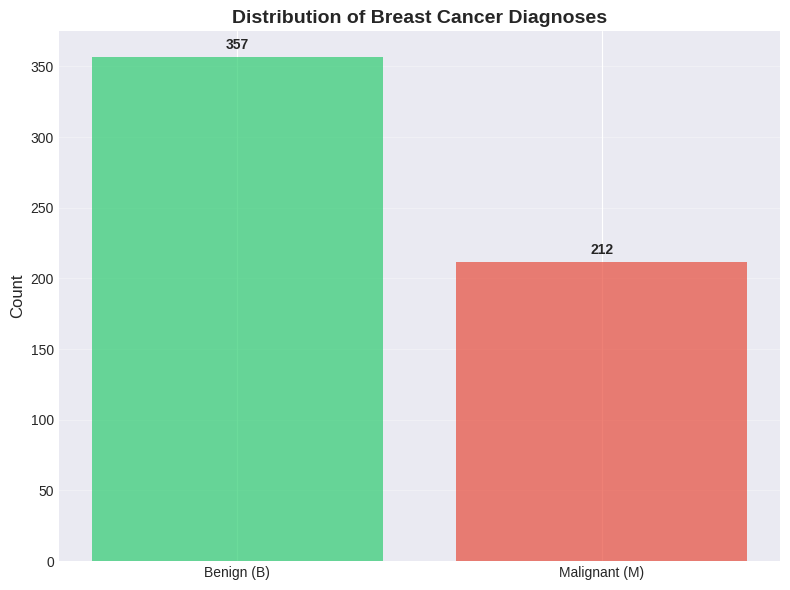


Summary Statistics for Mean Features:
       radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   569.000000    569.000000      569.000000  569.000000       569.000000   
mean     14.127292    654.889104        0.088799    0.062798         2.866059   
std       3.524049    351.914129        0.079720    0.007060         2.021855   
min       6.981000    143.500000        0.000000    0.049960         0.757000   
25%      11.700000    420.300000        0.029560    0.057700         1.606000   
50%      13.370000    551.100000        0.061540    0.061540         2.287000   
75%      15.780000    782.700000        0.130700    0.066120         3.357000   
max      28.110000   2501.000000        0.426800    0.097440        21.980000   

       compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
count        569.000000      569.000000           569.000000     569.000000   
mean           0.025478        0.020542            25.677223       0.1323

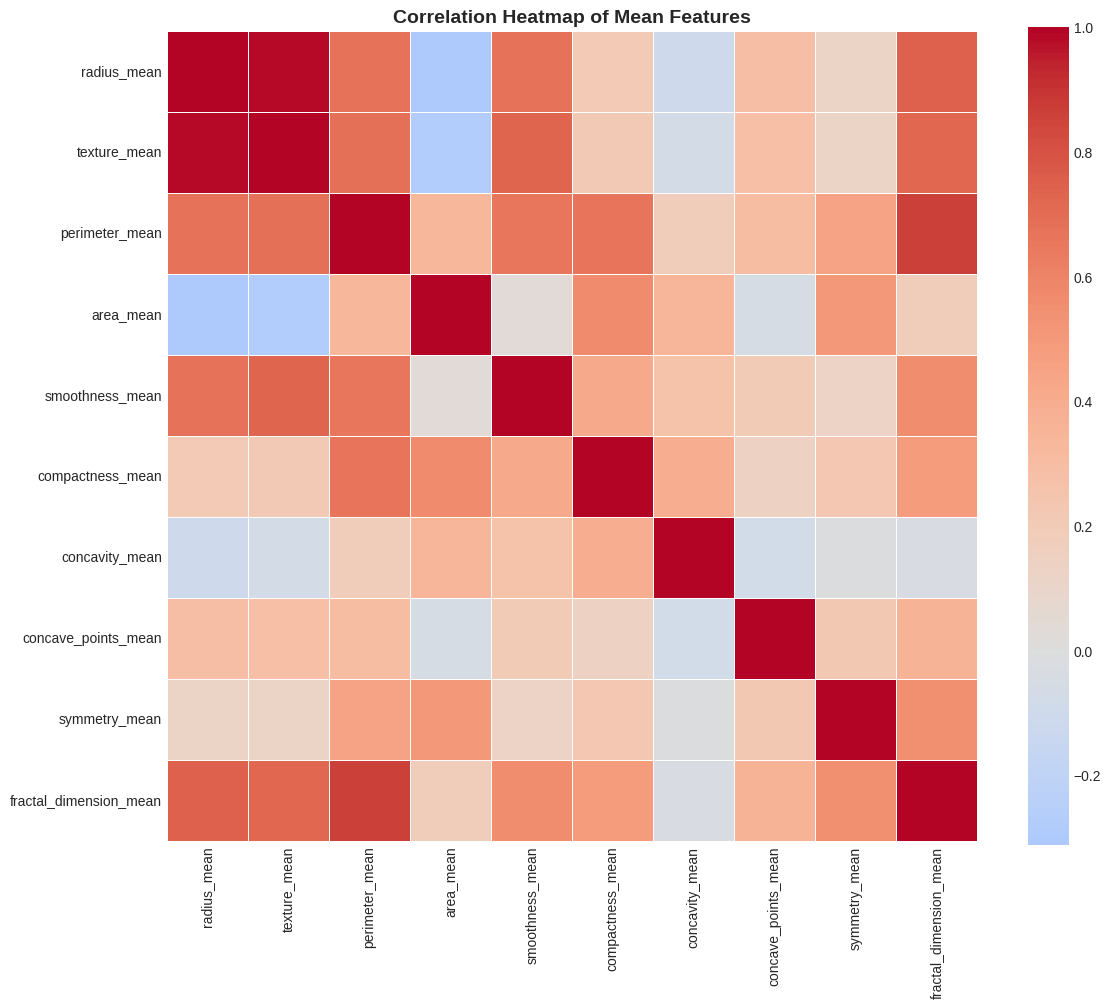

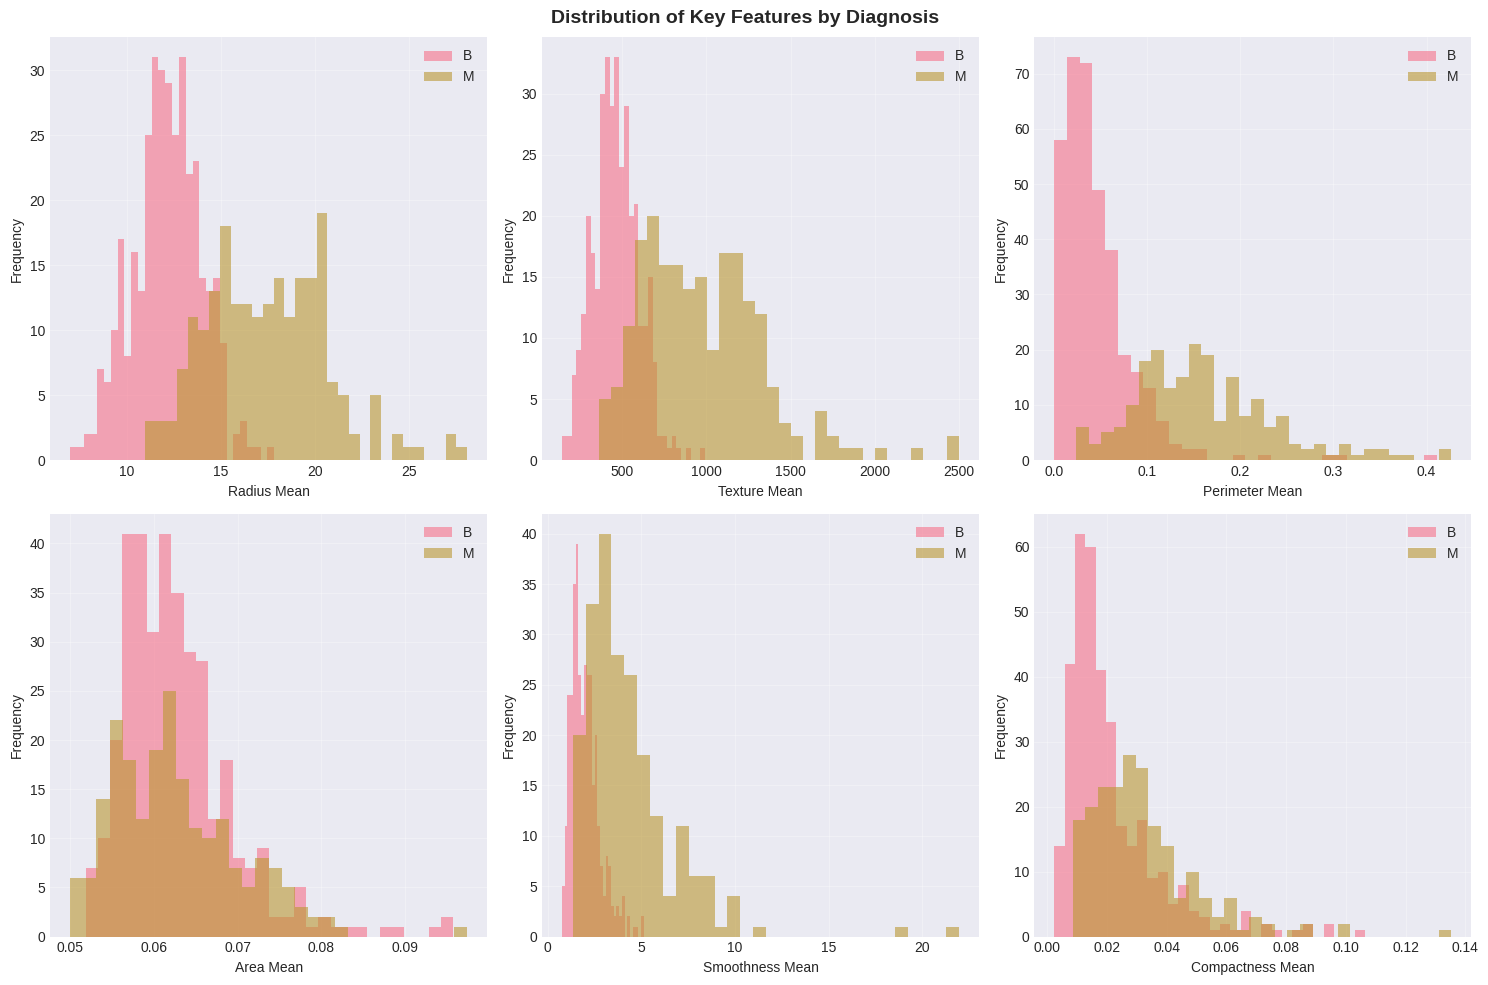

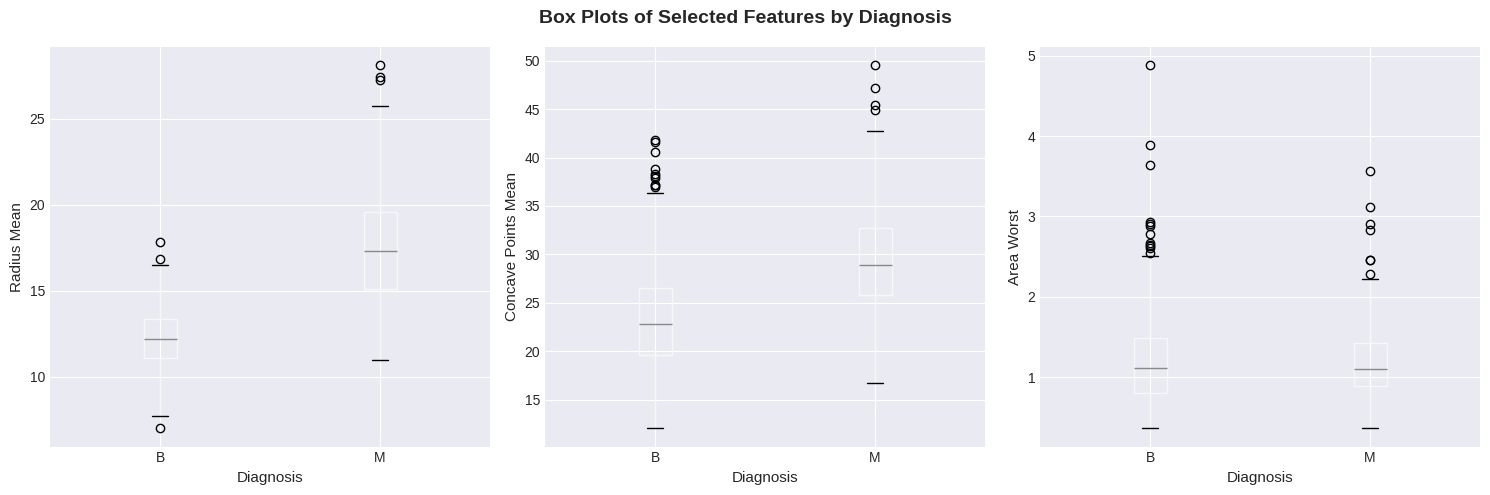

In [11]:
# displaying basic dataset information
print("Dataset Information:")
print(f"Number of samples: {len(df)}")
print(f"Number of features: {len(df.columns) - 2}")  # Excluding id and diagnosis
print(f"\nMissing values: {df.isnull().sum().sum()}")

# target variable distribution
print("\nDiagnosis Distribution:")
print(df['diagnosis'].value_counts())
print(f"\nPercentage Benign: {(df['diagnosis'] == 'B').sum() / len(df) * 100:.2f}%")
print(f"Percentage Malignant: {(df['diagnosis'] == 'M').sum() / len(df) * 100:.2f}%")

# visualizing target distribution
plt.figure(figsize=(8, 6))
diagnosis_counts = df['diagnosis'].value_counts()
colors = ['#2ecc71', '#e74c3c']
plt.bar(['Benign (B)', 'Malignant (M)'], diagnosis_counts.values, color=colors, alpha=0.7)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Breast Cancer Diagnoses', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(diagnosis_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# displaying summary statistics for mean features
mean_features = [col for col in df.columns if '_mean' in col]
summary_stats = df[mean_features].describe()
print("\nSummary Statistics for Mean Features:")
print(summary_stats)

# generating correlation heatmap for mean features
plt.figure(figsize=(12, 10))
correlation_matrix = df[mean_features].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Mean Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# displaying distribution plots for key features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean',
                'area_mean', 'smoothness_mean', 'compactness_mean']

for idx, feature in enumerate(key_features):
    ax = axes[idx // 3, idx % 3]
    for diagnosis in ['B', 'M']:
        data = df[df['diagnosis'] == diagnosis][feature]
        ax.hist(data, alpha=0.6, label=f'{diagnosis}', bins=30)
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend()
    ax.grid(alpha=0.3)

plt.suptitle('Distribution of Key Features by Diagnosis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# displaying box plots for selected features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
features_to_plot = ['radius_mean', 'concave_points_mean', 'area_worst']

for idx, feature in enumerate(features_to_plot):
    df.boxplot(column=feature, by='diagnosis', ax=axes[idx])
    axes[idx].set_xlabel('Diagnosis', fontsize=11)
    axes[idx].set_ylabel(feature.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_title('')

plt.suptitle('Box Plots of Selected Features by Diagnosis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Data Preprocessing for Machine Learning
To prepare the data for the different machine learning models, feature-target separation, binary encoding, train-test split, and feature scaling were all implemented. The 30 features were treated as independent variables and the binary diagnosis was treated as the dependent variable where benign = 0 and malignant = 1. The data was divided by an 80-20 train-test split and StandardScaler normalization was implemented to further normalize all features data to a mean of 0 and variance of 1, preventing features with larger magnitudes from dominating training.


In [12]:
# separating the features and target diagnosis
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0})  # M=1 (Malignant), B=0 (Benign)

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

# normalizing data using StandardScaler scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# converted back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nFeature scaling completed!")
print("Mean of scaled training features:", X_train_scaled.mean().mean())
print("Std of scaled training features:", X_train_scaled.std().mean())

Feature matrix shape: (569, 30)
Target vector shape: (569,)

Training set size: 455
Test set size: 114

Training set class distribution:
diagnosis
0    285
1    170
Name: count, dtype: int64

Test set class distribution:
diagnosis
0    72
1    42
Name: count, dtype: int64

Feature scaling completed!
Mean of scaled training features: 1.4412565565097268e-17
Std of scaled training features: 1.001100715798269


# Machine Learning Models
The following 4 different machine learning models were implemented.
1. Logistic Regression: the linear model estimates the probability of tumor malignancy using a logistic function, essentially capturing linear relationships between the tumor features and resulting diagnosis.
2. Random Forest: an ensemble of 100 decision trees that combines multiple weak learners to form a stronger predictor and uses non-linear relationships to provide feature importance rankings.
3. Neural Network: a feed-forward neural network with 2 hidden layers to capture more complex non-linear patterns within the data.
4. Voting Classifier: an ensemble method that combines the strengths from the previous 3 models by averaging the predicted probabilities to enhance the accuracy of diagnosis.

## Figure 5. Accuracy of Logistic Regression in Predicting Breast Cancer Diagnosis
## Figure 6. Accuracy of Random Forest in Predicting Breast Cancer Diagnosis
## Figure 7. Top 10 Feature Importance Rankings based by Random Forest model
## Figure 8. Accuracy of Neural Network in Predicting Breast Cancer Diagnosis
## Figure 9. Accuracy of Voting Classifier in Predicting Breast Cancer Diagnosis


Logistic Regression Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



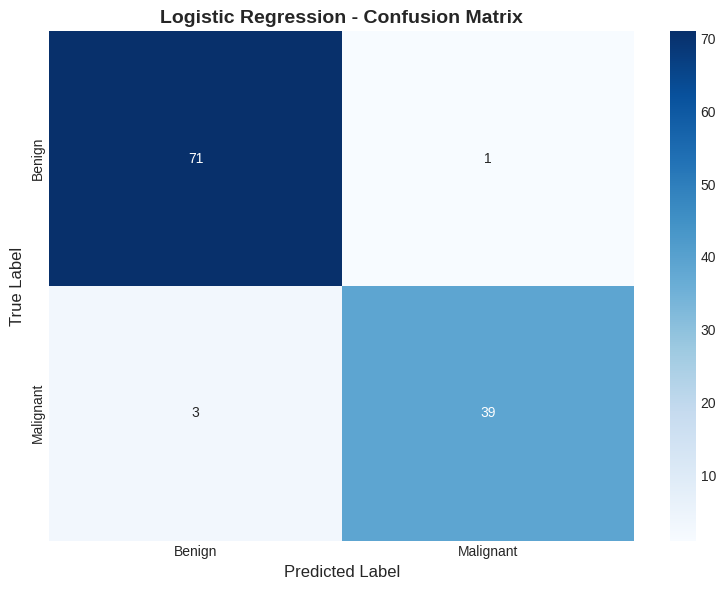

Random Forest Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



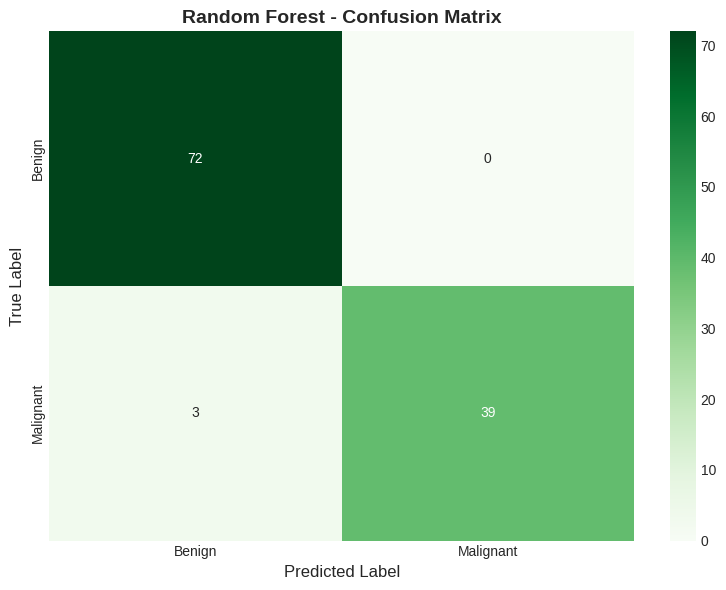

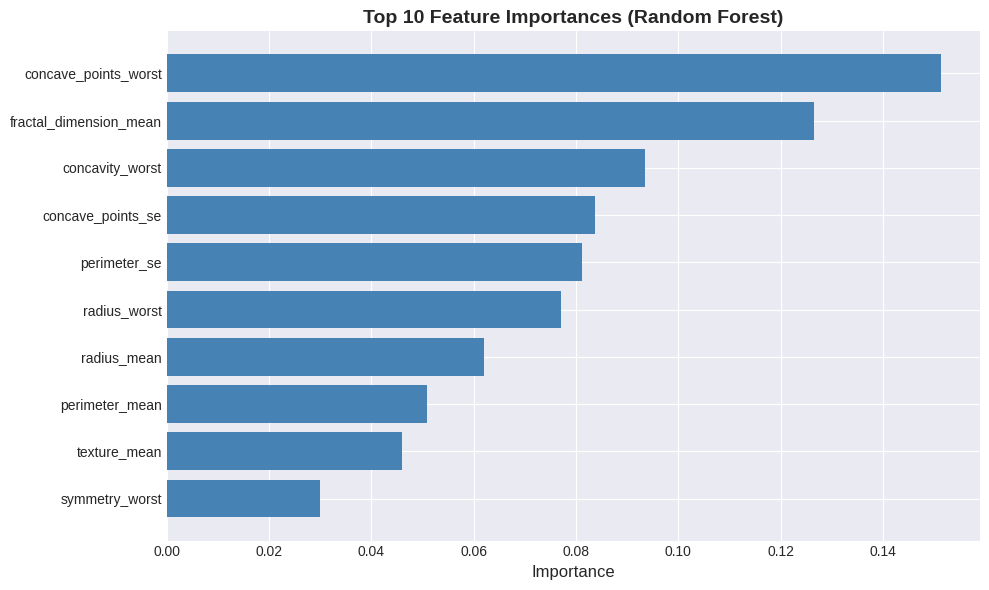

Neural Network Accuracy: 0.9298

Classification Report:
              precision    recall  f1-score   support

      Benign       0.92      0.97      0.95        72
   Malignant       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



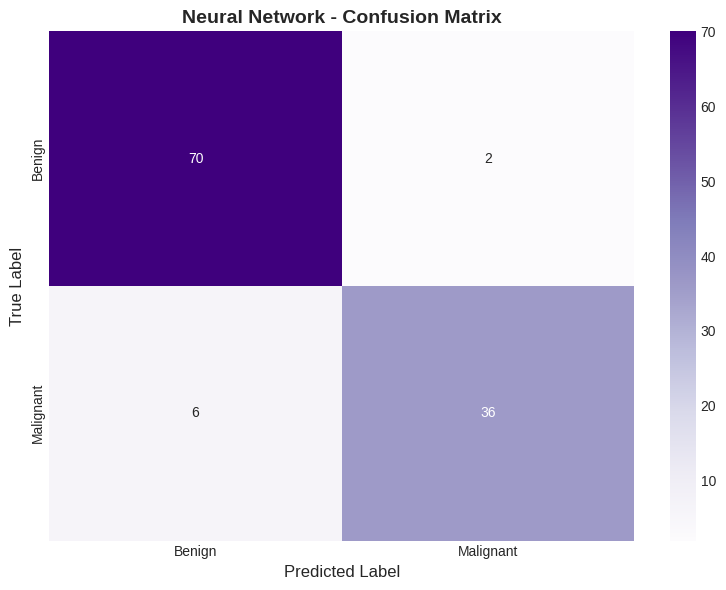

Voting Classifier Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



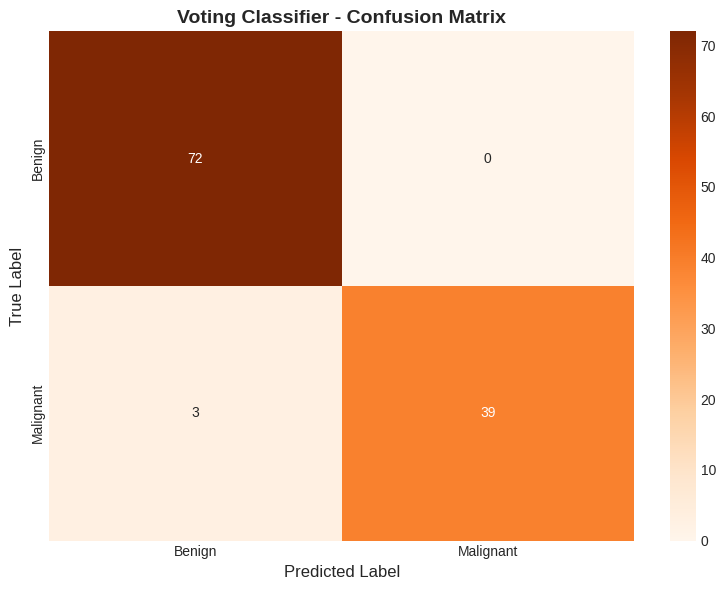

In [13]:
# 1. Logistic Regression
# training Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=10000)
lr_model.fit(X_train_scaled, y_train)

# predictions and evaluations
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr,
                          target_names=['Benign', 'Malignant']))

# generating confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Random Forest Classifier
# training Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# predictions and evaluations
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf,
                          target_names=['Benign', 'Malignant']))

# generating confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# generating feature importance figure
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance['importance'], color='steelblue')
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 10 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 3. Neural Network
# training Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(30, 15), max_iter=1000,
                         random_state=42, early_stopping=True)
nn_model.fit(X_train_scaled, y_train)

# predictions and evaluations
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_proba_nn = nn_model.predict_proba(X_test_scaled)[:, 1]

nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn,
                          target_names=['Benign', 'Malignant']))

# generating confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Voting Classifier
# creating a Voting Classifier ensemble
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('nn', nn_model)
    ],
    voting='soft'
)

voting_clf.fit(X_train_scaled, y_train)

# predictions and evaluations
y_pred_voting = voting_clf.predict(X_test_scaled)
y_pred_proba_voting = voting_clf.predict_proba(X_test_scaled)[:, 1]

voting_accuracy = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {voting_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_voting,
                          target_names=['Benign', 'Malignant']))

# generating confusion matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Voting Classifier - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Model Comparisons and Results
As shown in Figure 10, the Voting Classifier and Random Forest models achieved the highest accuracy (0.9737), followed by Logistic Regression (0.9649) and Neural Network (0.9298). The Voting Classifier, implemented with sklearn’s VotingClassifier using a “soft” voting mechanism that averages class probabilities, did not significantly improve accuracy but matched Random Forest’s performance. This confirms that the ensemble’s “soft” voting approach yields accuracy equal to or greater than individual models. All models achieved high recall rates (>92%), crucial for minimizing false negatives and positives in clinical settings, and the ROC curves in Figure 10 demonstrate strong discrimination across all models.

## Figure 10. Model Performance Comparisons Bar Graph (left) and ROC Curves (right)



Model Performance Comparison:
              Model  Accuracy
      Random Forest  0.973684
  Voting Classifier  0.973684
Logistic Regression  0.964912
     Neural Network  0.929825


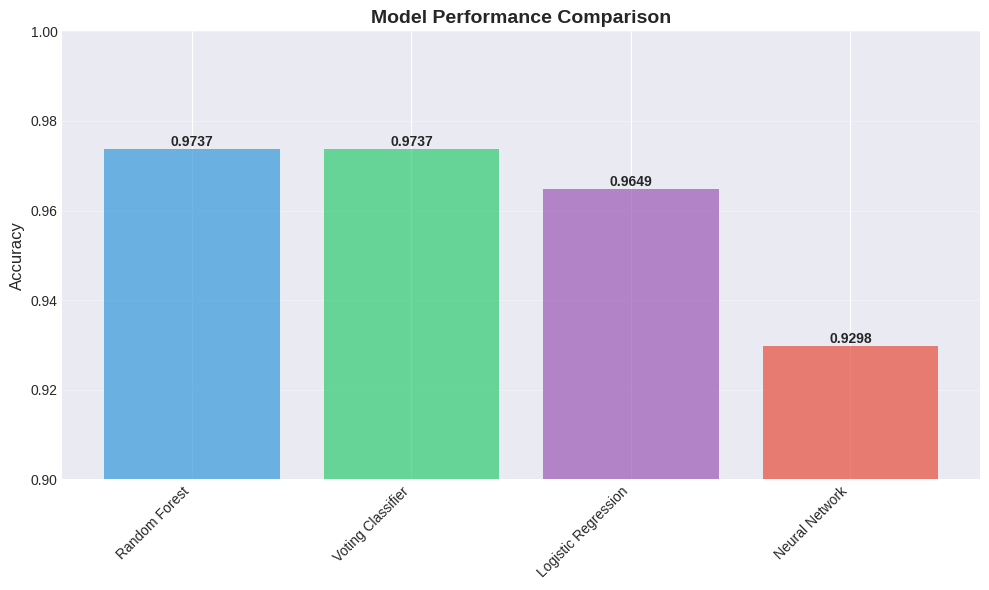

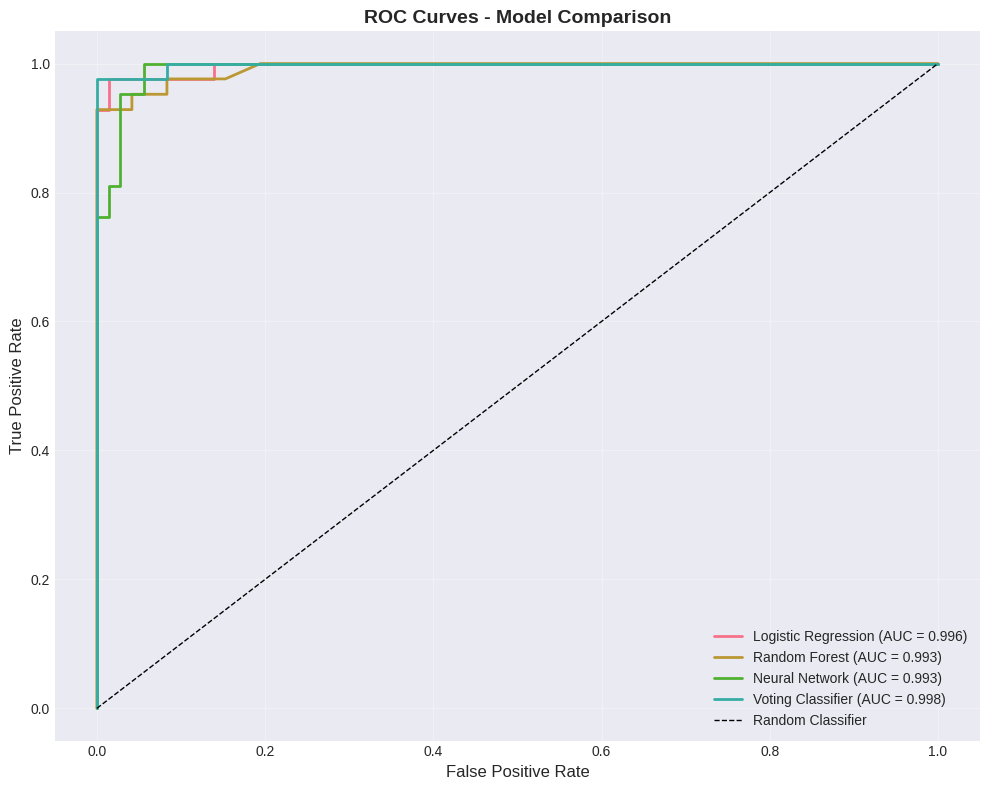


AUC Scores:
Logistic Regression: 0.9960
Random Forest: 0.9929
Neural Network: 0.9927
Voting Classifier: 0.9980


In [14]:
# comparing all 4 models
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network', 'Voting Classifier'],
    'Accuracy': [lr_accuracy, rf_accuracy, nn_accuracy, voting_accuracy]
}).sort_values('Accuracy', ascending=False)

print("Model Performance Comparison:")
print(models_comparison.to_string(index=False))

# generating visualization of model comparison
plt.figure(figsize=(10, 6))
colors_comp = ['#3498db', '#2ecc71', '#9b59b6', '#e74c3c']
bars = plt.bar(models_comparison['Model'], models_comparison['Accuracy'],
               color=colors_comp, alpha=0.7)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# generating ROC curves for all models
plt.figure(figsize=(10, 8))

# calculating ROC curves and AUC scores
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
fpr_voting, tpr_voting, _ = roc_curve(y_test, y_pred_proba_voting)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)
auc_nn = auc(fpr_nn, tpr_nn)
auc_voting = auc(fpr_voting, tpr_voting)

# plotting ROC curves
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.3f})', linewidth=2)
plt.plot(fpr_voting, tpr_voting, label=f'Voting Classifier (AUC = {auc_voting:.3f})',
         linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAUC Scores:")
print(f"Logistic Regression: {auc_lr:.4f}")
print(f"Random Forest: {auc_rf:.4f}")
print(f"Neural Network: {auc_nn:.4f}")
print(f"Voting Classifier: {auc_voting:.4f}")

# Limitations and Potential Future Research
Like all models, this project has inherent limitations. The UCI dataset includes only 569 samples from a single institution, limiting generalizability to broader populations and environments. The analysis also focuses solely on tumor features, omitting key clinical factors such as patient age, family history, and genetic markers.

Future work could incorporate additional clinical variables, test datasets from multiple institutions, and explore other machine learning models to improve generalizability. The model could also be expanded beyond binary “benign” or “malignant” classification to predict tumor subtypes or grades, and deep learning could be applied directly to raw FNA images rather than pre-extracted features.



# Conclusion
This project addresses breast cancer diagnosis by developing and evaluating machine learning models to automate tumor classification using the Wisconsin Diagnostic Dataset from UCI. Four algorithms were applied: Logistic Regression, Random Forest, Neural Network, and a Voting Classifier combining all 3 models.

Model performance was assessed using accuracy, precision, recall, F1-score, support, confusion matrices, and ROC curves. All models showed excellent discrimination between benign and malignant tumors, with “worst” case measurements, like perimeter, radius, concave points, being the most predictive of malignancy. These findings highlight the potential of machine learning to enhance the accuracy and efficiency of breast cancer diagnosis, complementing human expertise with computational precision.


# References
1. American Cancer Society. (2024, January 12). Key statistics for breast cancer. American Cancer Society. https://www.cancer.org/cancer/types/breast-cancer/about/how-common-is-breast-cancer.html
2. Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.
